___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Pandas Lesson, Session - 7</p><h1>

# Handling with Missing Values

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
id_no = ["P001","P002","P003","P004","P005","P006","P007","P008","P009","P010","P011"]
gender=["M","F","M","F","M","F","M","F","M","F","M"]
status = ["FT","PT","-","FT","PT","PT","FT","-","PT","FT",np.nan]
dept = ["DS","FS","AWS","AWS","DS",np.nan,"FS","FS",np.nan,"DS","AWS"]
V1 = np.array([2,3,5,np.nan,7,1,np.nan,10,14,"-",6])
V2 = np.array([8,np.nan,5,8,11,np.nan,np.nan,2,3,7,9])
salary = np.array([np.nan,54,59,120,58,75,np.nan,136,60,125,np.nan])
df = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


## Type of NaN Values

In [3]:
df.info() #Data yı genel olarak tanıyalım

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      float64
dtypes: float64(2), object(5)
memory usage: 744.0+ bytes


In [4]:
type(np.nan) #Dataların float olmasını analiz yaparken isteriz

float

In [5]:
type(np.NaN)

float

In [6]:
type(None) #Bu istenmeyen bir tip

NoneType

In [7]:
df.salary

0       NaN
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6       NaN
7     136.0
8      60.0
9     125.0
10      NaN
Name: salary, dtype: float64

In [8]:
type(df.salary[0])

numpy.float64

In [9]:
type(df.salary[1])

numpy.float64

In [10]:
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [11]:
type(df.status[2]) #- string olarak ifade edilmiş

str

In [12]:
type(df.status[10])

float

In [13]:
df.var1 #1 tane bile string ifade olursa data tipini object yapar

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [14]:
type(df.var1[3])

str

In [15]:
type(df.var1[6])

str

In [16]:
type(df.var1[9])

str

**What is the None keyword in Python?**

https://www.educative.io/edpresso/what-is-the-none-keyword-in-python

https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object

**Difference between None and NaN in Pandas**

https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas

https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb

**Difference between np.nan and np.NaN**

https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan

**Difference between nan and 'nan' in Python**

https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python

https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b

## Detecting Missing Values

NaN, standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

NaN is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [17]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


In [18]:
df.isnull() #Null olanları True yapar

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [19]:
df.notnull() #Null olanları False yapar

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [20]:
df.isnull().any() #Sütunlarda hiç null var mı baktı. Varsa True yapar. any(axis=0) da olurdu

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [21]:
df.isnull().any(axis=1) #Satır satır bakıp Null var mı baktı. Varsa True yapar

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [22]:
df.isnull().sum() #Her sütunda kaç tane null var verir

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [23]:
df.salary.isnull().sum()

3

In [24]:
df.salary.isnull().any()

True

In [25]:
df.isnull().sum()/len(df)*100 #Sütunların % kaçı null

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [26]:
df.loc[df.isnull().any(axis=1)] #herhangi null olan satırları getirir

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
8,P009,M,PT,NaN,14,3.0,60.0
10,P011,M,NaN,AWS,6,9.0,NaN


In [27]:
df.loc[df.isnull().all(axis=1)] #Hepsi null olan satırı getirir

,id,gender,status,dept,var1,var2,salary


In [28]:
df.loc[df.salary.isnull()] #df içinde salary nin null olduğu satırlar

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
6,P007,M,FT,FS,nan,NaN,NaN
10,P011,M,NaN,AWS,6,9.0,NaN


## Converting inappropriate values to NaN values

- map()
- replace()

In [29]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


In [30]:
df["var1"].map({"-":np.nan}) #var1 sütunundaki - yerine null atamak istiyorum. Map mantıklı değil. Hepsini Null yaptı

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

In [31]:
df["var1"].replace(to_replace="-", value=np.nan) #nan ve NaN farklı farklı oldu

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [32]:
df["var1"].replace(to_replace="-", value=np.nan).astype("float") #İkisini de aynı tip yaptık. Float olması en uygunu

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [33]:
df.var1 # Değişiklik kalıcı değil şu an

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [34]:
df["var1"]=df["var1"].replace(to_replace="-", value=np.nan).astype("float") #Değişiklik kalıcı oldu
df.var1

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [35]:
df.var1

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [36]:
df["status"] = df["status"].replace("-", np.nan) # Kalıcı olarak status içindeki - leri de NaN yaptık
df["status"]

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [37]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [38]:
df.isnull().sum() # Missing value değerleri artık daha net gözüküyor

id        0
gender    0
status    3
dept      2
var1      3
var2      3
salary    3
dtype: int64

**Notes:** When arg is a dictionary, values in Series that are not in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN.

https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.

## Missing value handling methods

 1. <b>Deleting Rows</b> ----->if it has more than 70-75% of missing values. This percentage can change according to the data. So each situation should be evaluated case by case.
    
 2. <b>Replacing With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ### Dropping
 
 - dropna()
 - drop()

In [39]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [40]:
df.dropna(axis=0, how="any", thresh=None, inplace=False) #Nan olan bütün satırları düşer

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58.0


In [41]:
df.dropna(axis=1, how="any", thresh=None, inplace=False) #Nan olan bütün sütunları düşer

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [42]:
df.dropna(axis=1, how="all", thresh=None, inplace=False) #Hepsi Null sa o sütunu sil. Hiç öyle sütun olmadığı için değişmedi

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


* 'any' : If any NA values are present, drop that row or column.
* 'all' : If all values are NA, drop that row or column.

https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe

In [43]:
df["delete_me"]=np.nan #Tamamen nan lardan oluşan bir sütun oluşturduk
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,NaN,8.0,120.0,NaN
4,P005,M,PT,DS,7.0,11.0,58.0,NaN
5,P006,F,PT,NaN,1.0,NaN,75.0,NaN
6,P007,M,FT,FS,NaN,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,NaN
9,P010,F,FT,DS,NaN,7.0,125.0,NaN


In [44]:
df.dropna(axis=1, how="all", thresh=None, inplace=False) #Hepsi Null sa o sütunu sil. delete_me olan sütunu sildi

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [45]:
df.dropna(axis=1, how="all", thresh=9, inplace=False) #İlgili sütunda 9 tane null olmayan sütun varsa o sütuna dokunma.

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,NaN
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


thresh=N requires that a column has at least N **non-NaNs to survive.** 

https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python/51584935

In [46]:
df.drop([1,3,5]) #1,3 ve 5. satırı düşürür

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
4,P005,M,PT,DS,7.0,11.0,58.0,NaN
6,P007,M,FT,FS,NaN,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,NaN
9,P010,F,FT,DS,NaN,7.0,125.0,NaN
10,P011,M,NaN,AWS,6.0,9.0,NaN,NaN


In [47]:
df.drop(["var1", "var2"], axis=1)

,id,gender,status,dept,salary,delete_me
0,P001,M,FT,DS,NaN,NaN
1,P002,F,PT,FS,54.0,NaN
2,P003,M,NaN,AWS,59.0,NaN
3,P004,F,FT,AWS,120.0,NaN
4,P005,M,PT,DS,58.0,NaN
5,P006,F,PT,NaN,75.0,NaN
6,P007,M,FT,FS,NaN,NaN
7,P008,F,NaN,FS,136.0,NaN
8,P009,M,PT,NaN,60.0,NaN
9,P010,F,FT,DS,125.0,NaN


In [48]:
df.drop(index=[1,3,5]) 
#df.drop([1,3,5]) ile aynı

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
4,P005,M,PT,DS,7.0,11.0,58.0,NaN
6,P007,M,FT,FS,NaN,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,NaN
9,P010,F,FT,DS,NaN,7.0,125.0,NaN
10,P011,M,NaN,AWS,6.0,9.0,NaN,NaN


In [49]:
df.drop(columns=["var1", "var2"])
#df.drop(["var1", "var2"], axis=1) ile aynı

,id,gender,status,dept,salary,delete_me
0,P001,M,FT,DS,NaN,NaN
1,P002,F,PT,FS,54.0,NaN
2,P003,M,NaN,AWS,59.0,NaN
3,P004,F,FT,AWS,120.0,NaN
4,P005,M,PT,DS,58.0,NaN
5,P006,F,PT,NaN,75.0,NaN
6,P007,M,FT,FS,NaN,NaN
7,P008,F,NaN,FS,136.0,NaN
8,P009,M,PT,NaN,60.0,NaN
9,P010,F,FT,DS,125.0,NaN


 ### Filling Missing Values (Imputation)
 - fillna()
 - where()
 - interpolate()

In [50]:
df.fillna(0) #Nan olan yerlere 0 ile doldur

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,0.0,0.0
1,P002,F,PT,FS,3.0,0.0,54.0,0.0
2,P003,M,0,AWS,5.0,5.0,59.0,0.0
3,P004,F,FT,AWS,0.0,8.0,120.0,0.0
4,P005,M,PT,DS,7.0,11.0,58.0,0.0
5,P006,F,PT,0,1.0,0.0,75.0,0.0
6,P007,M,FT,FS,0.0,0.0,0.0,0.0
7,P008,F,0,FS,10.0,2.0,136.0,0.0
8,P009,M,PT,0,14.0,3.0,60.0,0.0
9,P010,F,FT,DS,0.0,7.0,125.0,0.0


In [51]:
df.var1

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [52]:
df.var1.fillna(0) #İlgili sütundaki None ları 0 ile doldur

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

 #### a.Filling with a specific value

In [53]:
df.var1.mean()

6.0

In [54]:
df.var1

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [55]:
df["var1"].fillna(df["var1"].mean()) #var1 de Nole olanları mean olan 6.0 ile doldur

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [56]:
df.var1.median()

5.5

In [57]:
df["var1"].fillna(df["var1"].median()) #var1 de Null olanları median olan 5.5 ile doldur

0      2.0
1      3.0
2      5.0
3      5.5
4      7.0
5      1.0
6      5.5
7     10.0
8     14.0
9      5.5
10     6.0
Name: var1, dtype: float64

 #### b.Filling with any Proper Value

In [58]:
df.mean()

var1          6.000
var2          6.625
salary       85.875
delete_me       NaN
dtype: float64

In [59]:
df.fillna(df.mean()) #Her bir sütunun None değerlerini kendi meanı ile doldur

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.000,85.875,NaN
1,P002,F,PT,FS,3.0,6.625,54.000,NaN
2,P003,M,NaN,AWS,5.0,5.000,59.000,NaN
3,P004,F,FT,AWS,6.0,8.000,120.000,NaN
4,P005,M,PT,DS,7.0,11.000,58.000,NaN
5,P006,F,PT,NaN,1.0,6.625,75.000,NaN
6,P007,M,FT,FS,6.0,6.625,85.875,NaN
7,P008,F,NaN,FS,10.0,2.000,136.000,NaN
8,P009,M,PT,NaN,14.0,3.000,60.000,NaN
9,P010,F,FT,DS,6.0,7.000,125.000,NaN


In [60]:
df.fillna({"dept":"other", "var1":df.var1.mean(), "var2":df.var2.median()})

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,7.5,54.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,6.0,8.0,120.0,NaN
4,P005,M,PT,DS,7.0,11.0,58.0,NaN
5,P006,F,PT,other,1.0,7.5,75.0,NaN
6,P007,M,FT,FS,6.0,7.5,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,other,14.0,3.0,60.0,NaN
9,P010,F,FT,DS,6.0,7.0,125.0,NaN


**where() Replace values where the condition is False.**

In [61]:
df.notna() #None değerleri False verir

,id,gender,status,dept,var1,var2,salary,delete_me
0,True,True,True,True,True,True,False,False
1,True,True,True,True,True,False,True,False
2,True,True,False,True,True,True,True,False
3,True,True,True,True,False,True,True,False
4,True,True,True,True,True,True,True,False
5,True,True,True,False,True,False,True,False
6,True,True,True,True,False,False,False,False
7,True,True,False,True,True,True,True,False
8,True,True,True,False,True,True,True,False
9,True,True,True,True,False,True,True,False


In [62]:
df.where(cond=df.notna(), other=df.mean(), axis = 1) #False olan yerlere other ile tanımladığımız değeri atar. Burada otther ı mean() yaptık

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.000,85.875,NaN
1,P002,F,PT,FS,3.0,6.625,54.000,NaN
2,P003,M,NaN,AWS,5.0,5.000,59.000,NaN
3,P004,F,FT,AWS,6.0,8.000,120.000,NaN
4,P005,M,PT,DS,7.0,11.000,58.000,NaN
5,P006,F,PT,NaN,1.0,6.625,75.000,NaN
6,P007,M,FT,FS,6.0,6.625,85.875,NaN
7,P008,F,NaN,FS,10.0,2.000,136.000,NaN
8,P009,M,PT,NaN,14.0,3.000,60.000,NaN
9,P010,F,FT,DS,6.0,7.000,125.000,NaN


In [63]:
df.interpolate()

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,6.5,54.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,6.0,8.0,120.0,NaN
4,P005,M,PT,DS,7.0,11.0,58.0,NaN
5,P006,F,PT,NaN,1.0,8.0,75.0,NaN
6,P007,M,FT,FS,5.5,5.0,105.5,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,NaN
9,P010,F,FT,DS,10.0,7.0,125.0,NaN


https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/

 #### c.Filling the Missing Values of Categorical Variables

In [64]:
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,NaN,8.0,120.0,NaN
4,P005,M,PT,DS,7.0,11.0,58.0,NaN
5,P006,F,PT,NaN,1.0,NaN,75.0,NaN
6,P007,M,FT,FS,NaN,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,NaN
9,P010,F,FT,DS,NaN,7.0,125.0,NaN


In [85]:
df["dept"].mode() #Katagorik veriler daha çok mode ile doldurulur

0    DS
1    FS
dtype: object

In [66]:
df["dept"].mode()[0]

'AWS'

In [67]:
df["dept"].fillna(df["dept"].mode()[0]) #Nane olanları mode 0 olan AWS ile doldurur

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [68]:
df["dept"].fillna(method="bfill") #None a kendisinden bir önceki değeri verir. b: back (geri)

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [69]:
df["dept"].fillna(method="ffill") #None a kendisinden bir sonraki değeri verir. f:forwerd (ileri)

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

 #### d.Filling by condition & by Group of the Categorical Variables 

In [70]:
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,NaN,8.0,120.0,NaN
4,P005,M,PT,DS,7.0,11.0,58.0,NaN
5,P006,F,PT,NaN,1.0,NaN,75.0,NaN
6,P007,M,FT,FS,NaN,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,NaN
9,P010,F,FT,DS,NaN,7.0,125.0,NaN


In [71]:
df["dept"].fillna(method="ffill", inplace=True)
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,NaN,8.0,120.0,NaN
4,P005,M,PT,DS,7.0,11.0,58.0,NaN
5,P006,F,PT,DS,1.0,NaN,75.0,NaN
6,P007,M,FT,FS,NaN,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,FS,14.0,3.0,60.0,NaN
9,P010,F,FT,DS,NaN,7.0,125.0,NaN


In [72]:
df.loc[df["salary"]>=100, "status"] #salary 100 den büyük olan status ları getirir

3     FT
7    NaN
9     FT
Name: status, dtype: object

In [73]:
df.loc[df["salary"]<100, "status"] #Çalışma saati (Status) ile Maaş (Salary) arasında ilişki olabileceğini düşünerek Çalışma saatine göre Maaş 
                                   #sütununda Null ları doldurmaya  çalıştık. FT: Full time, PT: Part time

1     PT
2    NaN
4     PT
5     PT
8     PT
Name: status, dtype: object

In [74]:
df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True) #Değişklik yapmadı
df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0], inplace=True)
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,NaN,8.0,120.0,NaN
4,P005,M,PT,DS,7.0,11.0,58.0,NaN
5,P006,F,PT,DS,1.0,NaN,75.0,NaN
6,P007,M,FT,FS,NaN,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,FS,14.0,3.0,60.0,NaN
9,P010,F,FT,DS,NaN,7.0,125.0,NaN


In [75]:
df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])
df.loc[df["salary"]<100, "status"] = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54.0,NaN
2,P003,M,PT,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,NaN,8.0,120.0,NaN
4,P005,M,PT,DS,7.0,11.0,58.0,NaN
5,P006,F,PT,DS,1.0,NaN,75.0,NaN
6,P007,M,FT,FS,NaN,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,FS,14.0,3.0,60.0,NaN
9,P010,F,FT,DS,NaN,7.0,125.0,NaN


In [76]:
df.groupby(["gender", "dept"])["status"].apply(lambda x : x.mode()[0]) #apply ile

gender  dept
F       AWS     FT
        DS      FT
        FS      FT
M       AWS     PT
        DS      FT
        FS      FT
Name: status, dtype: object

In [77]:
df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0]) #transform ile

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [78]:
df["trans_status"] = df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0])
df

,id,gender,status,dept,var1,var2,salary,delete_me,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54.0,NaN,FT
2,P003,M,PT,AWS,5.0,5.0,59.0,NaN,PT
3,P004,F,FT,AWS,NaN,8.0,120.0,NaN,FT
4,P005,M,PT,DS,7.0,11.0,58.0,NaN,FT
5,P006,F,PT,DS,1.0,NaN,75.0,NaN,FT
6,P007,M,FT,FS,NaN,NaN,NaN,NaN,FT
7,P008,F,FT,FS,10.0,2.0,136.0,NaN,FT
8,P009,M,PT,FS,14.0,3.0,60.0,NaN,FT
9,P010,F,FT,DS,NaN,7.0,125.0,NaN,FT


In [79]:
df["status"].fillna(df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0]), inplace=True)
#Hayali olarak oluşturduğumuz trans_status sütununa göre status da None olanları doldur
df

,id,gender,status,dept,var1,var2,salary,delete_me,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54.0,NaN,FT
2,P003,M,PT,AWS,5.0,5.0,59.0,NaN,PT
3,P004,F,FT,AWS,NaN,8.0,120.0,NaN,FT
4,P005,M,PT,DS,7.0,11.0,58.0,NaN,FT
5,P006,F,PT,DS,1.0,NaN,75.0,NaN,FT
6,P007,M,FT,FS,NaN,NaN,NaN,NaN,FT
7,P008,F,FT,FS,10.0,2.0,136.0,NaN,FT
8,P009,M,PT,FS,14.0,3.0,60.0,NaN,FT
9,P010,F,FT,DS,NaN,7.0,125.0,NaN,FT


In [80]:
df.groupby("dept")["salary"].transform("mean") #Çok mantıklı değil

0     86.000000
1     83.333333
2     89.500000
3     89.500000
4     86.000000
5     86.000000
6     83.333333
7     83.333333
8     83.333333
9     86.000000
10    89.500000
Name: salary, dtype: float64

In [81]:
df.groupby(["status", "dept"])["salary"].transform("mean") #Bu şekilde yapmak daha mantıklı

0     125.0
1      57.0
2      59.0
3     120.0
4      66.5
5      66.5
6     136.0
7     136.0
8      57.0
9     125.0
10     59.0
Name: salary, dtype: float64

In [82]:
df["trans_salary"] = df.groupby(["status","dept"])["salary"].transform("mean")
df

,id,gender,status,dept,var1,var2,salary,delete_me,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,NaN,NaN,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,NaN,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,NaN,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0,NaN,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,NaN,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,NaN,FT,66.5
6,P007,M,FT,FS,NaN,NaN,NaN,NaN,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,NaN,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,NaN,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125.0,NaN,FT,125.0


In [83]:
df["salary"].fillna(df.groupby(["status","dept"])["salary"].transform("mean"), inplace=True)
df

,id,gender,status,dept,var1,var2,salary,delete_me,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125.0,NaN,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,NaN,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,NaN,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0,NaN,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,NaN,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,NaN,FT,66.5
6,P007,M,FT,FS,NaN,NaN,136.0,NaN,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,NaN,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,NaN,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125.0,NaN,FT,125.0


In [88]:
df.groupby(["gender", "status"])["var1"].mean() #gender ve status a göre grup yaptık

gender  status
F       FT        10.0
        PT         2.0
M       FT         2.0
        PT         8.0
Name: var1, dtype: float64

In [91]:
var1_trans=df.groupby(["gender", "status"])["var1"].transform("mean")
var1_trans

0      2.0
1      2.0
2      8.0
3     10.0
4      8.0
5      2.0
6      2.0
7     10.0
8      8.0
9     10.0
10     8.0
Name: var1, dtype: float64

In [95]:
df["var1"].fillna(var1_trans, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,delete_me,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125.0,NaN,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,NaN,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,NaN,PT,59.0
3,P004,F,FT,AWS,10.0,8.0,120.0,NaN,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,NaN,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,NaN,FT,66.5
6,P007,M,FT,FS,2.0,NaN,136.0,NaN,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,NaN,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,NaN,FT,57.0
9,P010,F,FT,DS,10.0,7.0,125.0,NaN,FT,125.0


In [97]:
cond = (df["gender"] =="M") & (df["status"]=="FT") #ayrı bir değişken tanımladık
cond

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
dtype: bool

In [98]:
df.loc[cond, "var2"] #Yukardaki sart 0 ve 6. satırda varmış

0    8.0
6    NaN
Name: var2, dtype: float64

In [101]:
df.loc[cond, "var2"].mode()[0]

8.0

In [102]:
df.loc[cond, "var2"].fillna(df.loc[cond, "var2"].mode()[0])

0    8.0
6    8.0
Name: var2, dtype: float64

In [103]:
df.var2

0      8.0
1      NaN
2      5.0
3      8.0
4     11.0
5      NaN
6      NaN
7      2.0
8      3.0
9      7.0
10     9.0
Name: var2, dtype: float64

In [106]:
df["var2"].fillna(df.groupby("status")["var2"].transform("mean"), inplace = True)
df #Status a göre var 2 yi grupladık. Mean a göre var2 yi doldurduk

,id,gender,status,dept,var1,var2,salary,delete_me,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.00,125.0,NaN,FT,125.0
1,P002,F,PT,FS,3.0,7.00,54.0,NaN,FT,57.0
2,P003,M,PT,AWS,5.0,5.00,59.0,NaN,PT,59.0
3,P004,F,FT,AWS,10.0,8.00,120.0,NaN,FT,120.0
4,P005,M,PT,DS,7.0,11.00,58.0,NaN,FT,66.5
5,P006,F,PT,DS,1.0,7.00,75.0,NaN,FT,66.5
6,P007,M,FT,FS,2.0,6.25,136.0,NaN,FT,136.0
7,P008,F,FT,FS,10.0,2.00,136.0,NaN,FT,136.0
8,P009,M,PT,FS,14.0,3.00,60.0,NaN,FT,57.0
9,P010,F,FT,DS,10.0,7.00,125.0,NaN,FT,125.0


### filling with Interpolation

Pandas dataframe.interpolate() function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value.

https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

In [107]:
flights = sns.load_dataset("flights") #Seaborn içinde bulunan örnek flights datasını yükledik
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [121]:
flights.isnull().sum() #sütun sütun null sayısı 

year          0
month         0
passengers    0
dtype: int64

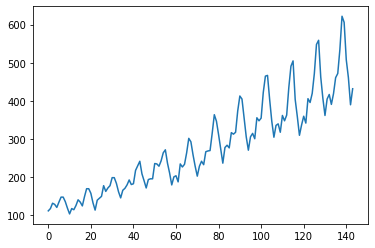

In [123]:
flights.passengers.plot()

In [ ]:
#Suni olarak Nan oluşturup onları dolduralım

In [124]:
flights_copy = flights.copy() #orjinal verimi kopyladım. 

In [125]:
flights_copy.loc[np.random.randint(1,144,20), "passengers"] = None #passenger sütutuma rastgele 20 değer yapıp onları Nan yaptık

In [128]:
flights_copy.isnull().sum()

year           0
month          0
passengers    19
dtype: int64

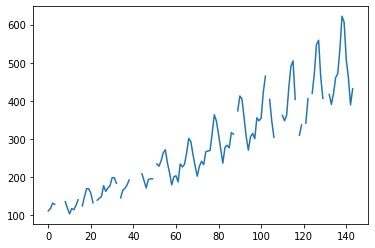

In [129]:
flights_copy.passengers.plot() #Boşlukları görebiliyoruz

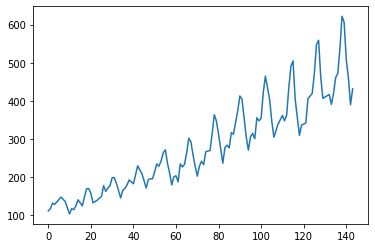

In [132]:
flights_copy["passengers"].interpolate().plot() # interpolate e göre Doldurma işlemi yaptık. Orjinal veriye çok benzedi
                                                # Lineer olarak iki sayı arasını doldurur. Linspace mantığı gibi. Eşit aralıklara bölüp değer giriyor.